In [9]:
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py"
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py"

#
# Similarly, in this ipynb, we need also download a wav file from github, 
# the file is "92002__jcveliz__violin-origional.wav"
# please remove '#' such that those !wget can be run in advance.
#

!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/92002__jcveliz__violin-origional.wav"
!mkdir wav
!cp 92002__jcveliz__violin-origional.wav wav/

--2020-04-14 15:38:24--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47674 (47K) [text/plain]
Saving to: ‘thinkdsp.py.3’

thinkdsp.py.3       100%[===================>]  46.56K  --.-KB/s    in 0.02s   

2020-04-14 15:38:24 (2.26 MB/s) - ‘thinkdsp.py.3’ saved [47674/47674]

--2020-04-14 15:38:26--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22756 (22K) [text/plain]
Saving to: 

In [23]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interact, fixed
from IPython.display import display

ModuleNotFoundError: ignored

In [12]:
wave = thinkdsp.read_wave('92002__jcveliz__violin-origional.wav')
wave.normalize()
wave.make_audio()

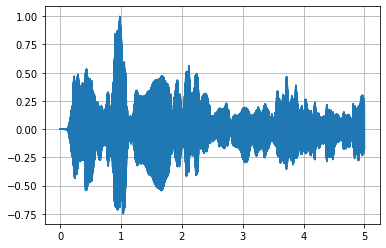

In [13]:
wave.plot()

import matplotlib.pyplot as pl
pl.grid()

In [14]:
segment = wave.segment(start=1.1, duration=0.3)
segment.make_audio()

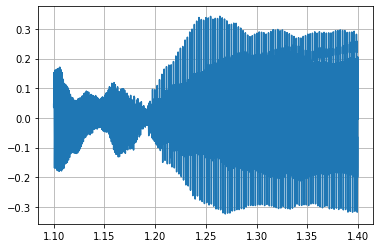

In [15]:
segment.plot()
pl.grid()

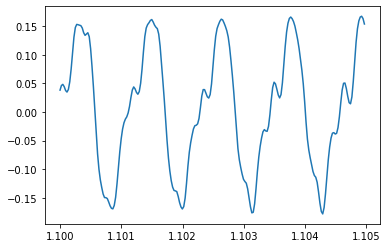

In [16]:
segment.segment(start=1.1, duration=0.005).plot()

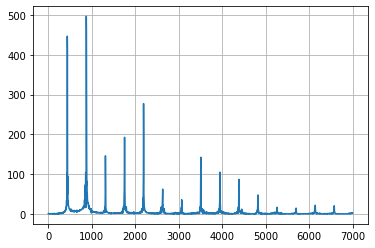

In [17]:
spectrum = segment.make_spectrum()
spectrum.plot(high=7000)
pl.grid()

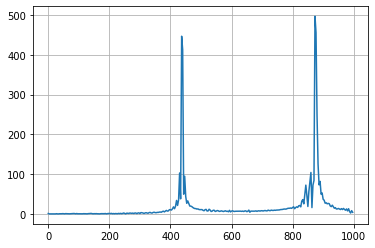

In [18]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1000)
pl.grid()


In [0]:
spectrum.peaks()[:30]
spectrum.peaks??

In [0]:
spectrum.low_pass(2000)

In [21]:
spectrum.make_wave().make_audio()

In [0]:
def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=5000, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=5000, color='#045a8d')
    thinkplot.config(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [26]:
interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 5000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…